<a href="https://colab.research.google.com/github/Abhimokashe/XGBOOST/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score,roc_auc_score,make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix

In [5]:
df = pd.read_excel("/content/drive/MyDrive/Telco_customer_churn[1].xlsx")

In [6]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [7]:
df.shape

(7043, 33)

In [8]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

Last four varibles contain exist interview information and should not be used for prediction. So they can be removed

In [9]:
df.drop(['Churn Label','Churn Score','CLTV','Churn Reason'],axis=1,inplace=True)

In [10]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


Some of the other columns have single value,and will not useful for classification.

In [11]:
df.Count.unique()

array([1])

In [12]:
df.Country.unique()

array(['United States'], dtype=object)

In [13]:
df.State.unique()

array(['California'], dtype=object)

We can remove customerid and latlong

In [14]:
df.drop(['CustomerID','Count','Country','State','Lat Long'],axis=1,inplace=True)

In [15]:
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [16]:
df['City'].replace(' ','_',regex=True,inplace=True)
df['City'].unique()[0:10]

array(['Los_Angeles', 'Beverly_Hills', 'Huntington_Park', 'Lynwood',
       'Marina_Del_Rey', 'Inglewood', 'Santa_Monica', 'Torrance',
       'Whittier', 'La_Habra'], dtype=object)

In [17]:
df.columns = df.columns.str.replace(' ','_')
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [18]:
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn_Value            int64
dtype: object

In [19]:
df['Phone_Service'].unique()

array(['Yes', 'No'], dtype=object)

In [20]:
df['Total_Charges'].unique()

array([108.15, 151.65, 820.5, ..., 7362.9, 346.45, 6844.5], dtype=object)

In [21]:
len(df.loc[df['Total_Charges']==" "])

11

In [22]:
df.loc[df['Total_Charges']==" "]

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


In [23]:
df.loc[(df['Total_Charges']==' '),'Total_Charges']=0

In [24]:
df.loc[df['Tenure_Months']==0]

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,0


In [26]:
df['Total_Charges'] = pd.to_numeric(df['Total_Charges'])
df['Total_Charges'].dtypes

dtype('float64')

In [27]:
df.replace(' ','_',regex=True,inplace=True)
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30,1


In [28]:
X = df.drop('Churn_Value',axis=1).copy()
X.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30


In [29]:
y = df['Churn_Value'].copy()

In [45]:
Categorical_Objects= X.describe(include='object').columns

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 

In [47]:
for i in Categorical_Objects:
  

City
Gender
Senior_Citizen
Partner
Dependents
Phone_Service
Multiple_Lines
Internet_Service
Online_Security
Online_Backup
Device_Protection
Tech_Support
Streaming_TV
Streaming_Movies
Contract
Paperless_Billing
Payment_Method


In [48]:
X['City'] = le.fit_transform(X['City'])

In [49]:
X['Gender'] = le.fit_transform(X['Gender'])

In [50]:
X['Senior_Citizen'] = le.fit_transform(X['Senior_Citizen'])

In [51]:
X['Partner'] = le.fit_transform(X['Partner'])

In [52]:
X['Dependents'] = le.fit_transform(X['Dependents'])

In [53]:
X['Phone_Service'] = le.fit_transform(X['Phone_Service'])

In [54]:
X['Multiple_Lines'] = le.fit_transform(X['Multiple_Lines'])

In [55]:
X['Internet_Service'] = le.fit_transform(X['Internet_Service'])

In [56]:
X['Online_Security'] = le.fit_transform(X['Online_Security'])

In [57]:
X['Online_Backup'] = le.fit_transform(X['Online_Backup'])

In [58]:
X['Device_Protection'] = le.fit_transform(X['Device_Protection'])

In [59]:
X['Tech_Support'] = le.fit_transform(X['Tech_Support'])

In [60]:
X['Streaming_TV'] = le.fit_transform(X['Streaming_TV'])

In [61]:
X['Streaming_Movies'] = le.fit_transform(X['Streaming_Movies'])

In [62]:
X['Contract'] = le.fit_transform(X['Contract'])

In [63]:
X['Paperless_Billing'] = le.fit_transform(X['Paperless_Billing'])

In [64]:
X['Payment_Method'] = le.fit_transform(X['Payment_Method'])

In [65]:
X.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,562,90003,33.964131,-118.272783,1,0,0,0,2,1,...,2,0,0,0,0,0,1,3,53.85,108.15
1,562,90005,34.059281,-118.307420,0,0,0,1,2,1,...,0,0,0,0,0,0,1,2,70.70,151.65
2,562,90006,34.048013,-118.293953,0,0,0,1,8,1,...,0,2,0,2,2,0,1,2,99.65,820.50
3,562,90010,34.062125,-118.315709,0,0,1,1,28,1,...,0,2,2,2,2,0,1,2,104.80,3046.05
4,562,90015,34.039224,-118.266293,1,0,0,1,49,1,...,2,2,0,2,2,0,1,0,103.70,5036.30


**Train Test Split**

In [66]:
sum(y)/len(y)

0.2653698707936959

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,stratify=y)

In [68]:
sum(y_train)/len(y_train)

0.2654297614539947

In [69]:
sum(y_test)/len(y_test)

0.26519023282226006

In [70]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',missing=None,random_state=42)
clf_xgb.fit(X_train,y_train,verbose=True,early_stopping_rounds = 10,eval_metric='aucpr',eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.61974
[1]	validation_0-aucpr:0.63550
[2]	validation_0-aucpr:0.64573
[3]	validation_0-aucpr:0.65200
[4]	validation_0-aucpr:0.65503
[5]	validation_0-aucpr:0.65401
[6]	validation_0-aucpr:0.65049
[7]	validation_0-aucpr:0.65451
[8]	validation_0-aucpr:0.65357
[9]	validation_0-aucpr:0.65049
[10]	validation_0-aucpr:0.65110
[11]	validation_0-aucpr:0.65226
[12]	validation_0-aucpr:0.65447


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-aucpr:0.65518
[14]	validation_0-aucpr:0.65460
[15]	validation_0-aucpr:0.65343
[16]	validation_0-aucpr:0.65338
[17]	validation_0-aucpr:0.65614
[18]	validation_0-aucpr:0.65598
[19]	validation_0-aucpr:0.65688
[20]	validation_0-aucpr:0.65590
[21]	validation_0-aucpr:0.65342
[22]	validation_0-aucpr:0.64786
[23]	validation_0-aucpr:0.64604
[24]	validation_0-aucpr:0.64479
[25]	validation_0-aucpr:0.64431
[26]	validation_0-aucpr:0.64759
[27]	validation_0-aucpr:0.64556
[28]	validation_0-aucpr:0.64544
[29]	validation_0-aucpr:0.64878


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=None, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [71]:
clf_xgb = xgb.XGBClassifier(seed = 42,objective='binary:logistic',gamma=0.25,learn_rate=1,max_depths=4,reg_lambda=10,scale_pos_weight=0.9,sub_sample=0.9,col_sample_bytree=0.5,n_estimators=1)
clf_xgb.fit(X_train,y_train)

[12:42:35] WARNING: ../src/learner.cc:767: 
Parameters: { "col_sample_bytree", "learn_rate", "max_depths", "sub_sample" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              col_sample_bytree=0.5, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.25, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learn_rate=1, learning_rate=None,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_depths=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=1, n_jobs=None, ...)

In [73]:
bst = clf_xgb.get_booster()
for importance_type in ('weight','gain','cover','total_gain','total_cover'):
  print('%s: ' % importance_type,bst.get_score(importance_type=importance_type))

weight:  {'City': 2.0, 'Zip_Code': 5.0, 'Latitude': 3.0, 'Longitude': 1.0, 'Senior_Citizen': 1.0, 'Dependents': 2.0, 'Tenure_Months': 2.0, 'Internet_Service': 2.0, 'Online_Security': 1.0, 'Streaming_Movies': 1.0, 'Contract': 1.0, 'Monthly_Charges': 4.0, 'Total_Charges': 3.0}
gain:  {'City': 2.5347869396209717, 'Zip_Code': 3.780566453933716, 'Latitude': 2.3352508544921875, 'Longitude': 2.678487777709961, 'Senior_Citizen': 3.4634876251220703, 'Dependents': 26.644210815429688, 'Tenure_Months': 60.15952682495117, 'Internet_Service': 32.10563659667969, 'Online_Security': 150.95834350585938, 'Streaming_Movies': 1.2706613540649414, 'Contract': 568.5560302734375, 'Monthly_Charges': 14.251960754394531, 'Total_Charges': 13.107409477233887}
cover:  {'City': 99.71249389648438, 'Zip_Code': 154.4949951171875, 'Latitude': 267.4083251953125, 'Longitude': 33.5, 'Senior_Citizen': 34.849998474121094, 'Dependents': 188.64999389648438, 'Tenure_Months': 332.2124938964844, 'Internet_Service': 159.66250610351

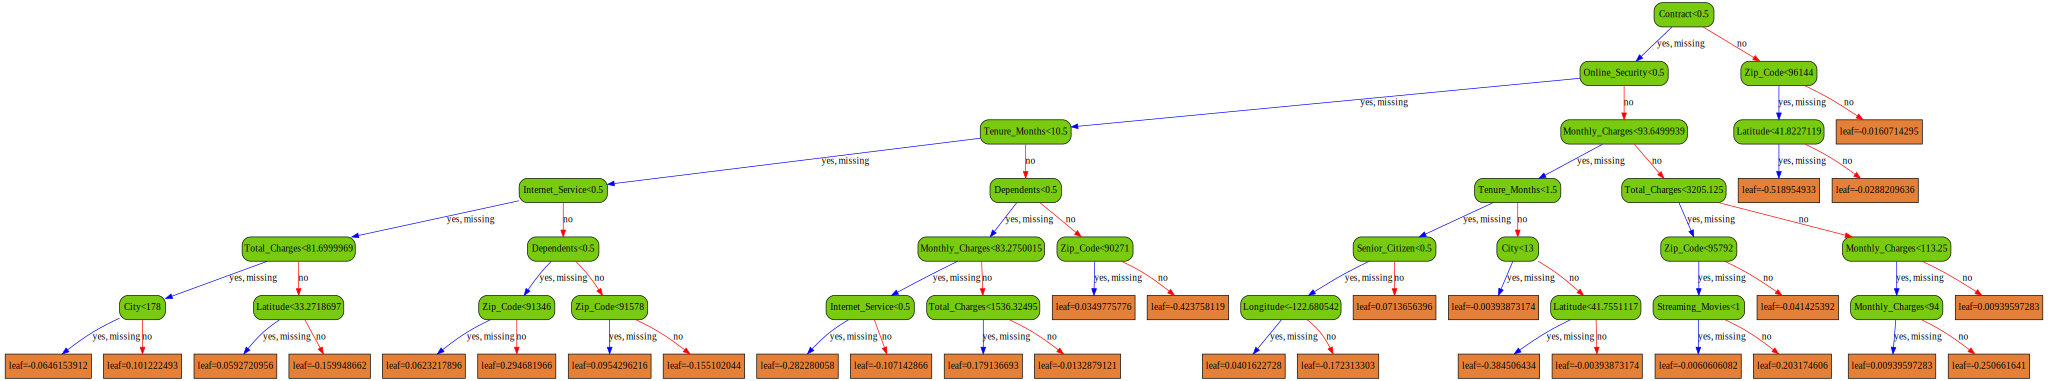

In [74]:
node_params = {'shape' : 'box','style':'filled,rounded','fillcolor':'#78cbe'}

leaf_params = {'shape':'box','style':'filled','fillcolor':'#e48038'}

xgb.to_graphviz(clf_xgb,num_trees=0,size='10,10',condition_node_params=node_params,leaf_node_params=leaf_params)